#### Dataset

In [2]:
# Dataset: iris.csv
# Location: https://mitu.co.in/dataset

#### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data

In [6]:
df = pd.read_csv('iris.csv')

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Separate the input and output data

In [9]:
x = df.drop('species', axis = 1)
y = df['species']

In [10]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Explore 

<Axes: xlabel='species', ylabel='count'>

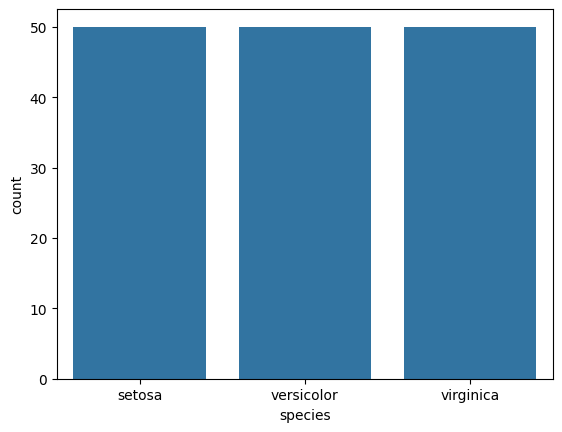

In [12]:
sns.countplot(x = y)

In [13]:
y.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#### Normalize the data

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

#### Cross Validation

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0)

In [21]:
x_train.shape

(112, 4)

In [22]:
x_test.shape

(38, 4)

#### Build the model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)

KNeighborsClassifier()

#### Evaluate the performance

In [26]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [27]:
y_pred = clf.predict(x_test)

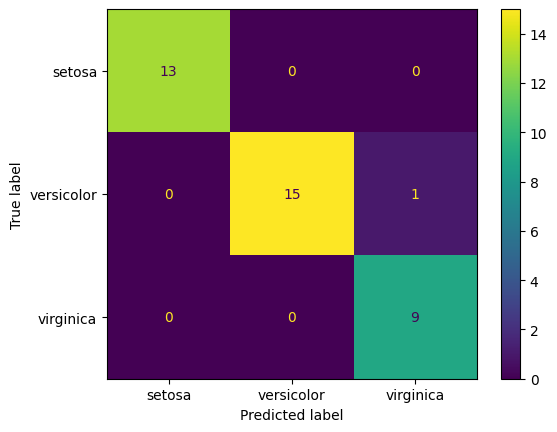

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [29]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [30]:
new = pd.DataFrame({
    'sepal_length':[5.7, 5.4, 6.2],
    'sepal_width':[2.5, 3.9, 2.2],
    'petal_length':[5, 1.3, 4.5],
    'petal_width':[2, 0.4, 1.5]
})

In [31]:
new

,sepal_length,sepal_width,petal_length,petal_width
0,5.7,2.5,5.0,2.0
1,5.4,3.9,1.3,0.4
2,6.2,2.2,4.5,1.5


In [32]:
clf.predict(scaler.transform(new))

array(['virginica', 'setosa', 'versicolor'], dtype=object)